<a href="https://colab.research.google.com/github/govldbstj/AIpractice/blob/main/0309practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IRIS dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA

import plotly.express as px 

In [43]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris/train.csv')

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris/test.csv')

submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris/sample_submission.csv')

## EDA</br>
Exploratory Data Analysis

In [44]:
iris = train

In [45]:
# 상위 5개
iris.head()

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,4.6,3.6,1.0,0.2,0
1,1,5.7,4.4,1.5,0.4,0
2,2,6.7,3.1,4.4,1.4,1
3,3,4.8,3.4,1.6,0.2,0
4,4,4.4,3.2,1.3,0.2,0


In [46]:
iris.columns # 4개의 피쳐 -> 1개의 target

Index(['id', 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [47]:
iris.shape # 형상 (150*6 matrix -> 150개의 칼럼과 6개의 피쳐)

(120, 6)

In [48]:
iris.info() # null이나 자료형에 대한 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 120 non-null    int64  
 1   sepal length (cm)  120 non-null    float64
 2   sepal width (cm)   120 non-null    float64
 3   petal length (cm)  120 non-null    float64
 4   petal width (cm)   120 non-null    float64
 5   species            120 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 5.8 KB


In [51]:
iris.describe() # iris 데이터셋 내에 있는 데이터에 대한 정보 (count, mean, IQR)

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,59.500000,5.809167,3.061667,3.726667,1.183333,0.991667
std,34.785054,0.823805,0.449123,1.752345,0.752289,0.814736
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,29.750000,5.100000,2.800000,1.500000,0.300000,0.000000
50%,59.500000,5.750000,3.000000,4.250000,1.300000,1.000000
75%,89.250000,6.400000,3.400000,5.100000,1.800000,2.000000
max,119.000000,7.700000,4.400000,6.700000,2.500000,2.000000


In [54]:
iris['sepal length (cm)'].value_counts() # count 개수

5.0    9
5.1    8
6.3    8
6.7    6
5.7    6
5.8    6
5.5    6
4.9    5
6.4    5
6.0    5
5.4    5
5.6    4
6.1    4
4.6    4
5.2    4
7.2    3
7.7    3
6.2    3
4.4    3
5.9    3
6.9    3
6.5    3
6.6    2
4.8    2
4.5    1
7.4    1
7.3    1
5.3    1
4.3    1
7.0    1
4.7    1
6.8    1
7.6    1
7.1    1
Name: sepal length (cm), dtype: int64

In [57]:
iris['sepal length (cm)'].value_counts(normalize = True) # count 비율인데 합이 1

5.0    0.075000
5.1    0.066667
6.3    0.066667
6.7    0.050000
5.7    0.050000
5.8    0.050000
5.5    0.050000
4.9    0.041667
6.4    0.041667
6.0    0.041667
5.4    0.041667
5.6    0.033333
6.1    0.033333
4.6    0.033333
5.2    0.033333
7.2    0.025000
7.7    0.025000
6.2    0.025000
4.4    0.025000
5.9    0.025000
6.9    0.025000
6.5    0.025000
6.6    0.016667
4.8    0.016667
4.5    0.008333
7.4    0.008333
7.3    0.008333
5.3    0.008333
4.3    0.008333
7.0    0.008333
4.7    0.008333
6.8    0.008333
7.6    0.008333
7.1    0.008333
Name: sepal length (cm), dtype: float64

In [58]:
iris['sepal length (cm)'].unique() # iris 데이터셋에 있는 유니크한 값들 전부

array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.8, 6. , 5.4, 5.5,
       6.6, 7.2, 7.6, 5.6, 5.1, 7.7, 6.2, 4.9, 5.9, 6.9, 6.1, 4.3, 6.8,
       4.7, 6.5, 7. , 4.5, 5.3, 7.3, 7.4, 7.1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f803119b160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f803119b700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f803120be50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f803119bca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f803119bf70>],
 'means': []}

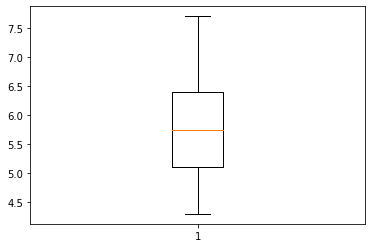

In [61]:
# boxplot

import matplotlib.pyplot as plt
import seaborn as submission
plt.boxplot(iris['sepal length (cm)'])

<AxesSubplot:>

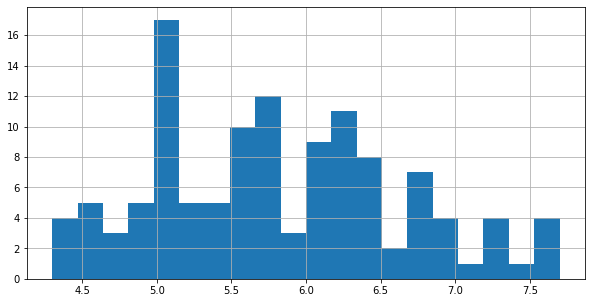

In [64]:
iris['sepal length (cm)'].hist(bins = 20, figsize = (10, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f803117ac70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8031188250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f803117a9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f80311887f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8031188ac0>],
 'means': []}

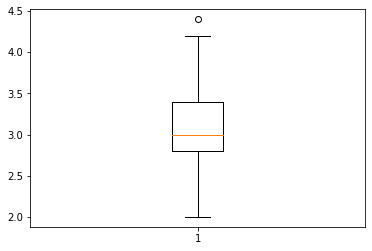

In [62]:
plt.boxplot(iris['sepal width (cm)'])

<AxesSubplot:>

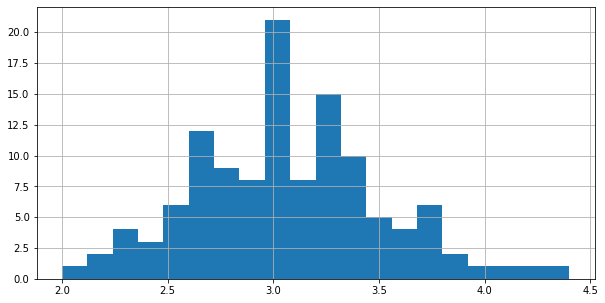

In [65]:
iris['sepal width (cm)'].hist(bins = 20, figsize = (10, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f802f200d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f802f20f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f802f200a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f802f20f8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f802f20fbb0>],
 'means': []}

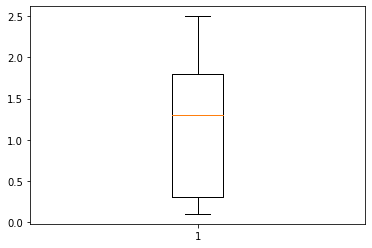

In [70]:
plt.boxplot(iris['petal width (cm)'])

<AxesSubplot:>

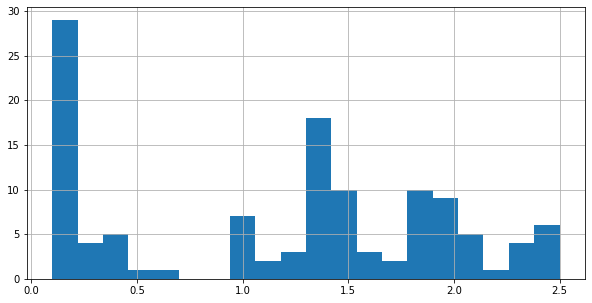

In [71]:
iris['petal width (cm)'].hist(bins = 20, figsize = (10, 5))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f802f175fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f802f1035b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f802f175d00>],
 'medians': [<matplotlib.lines.Line2D at 0x7f802f103af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f802f103dc0>],
 'means': []}

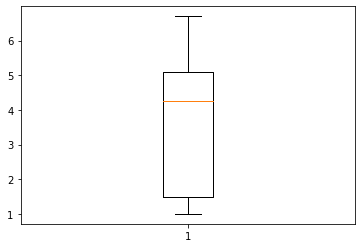

In [72]:
plt.boxplot(iris['petal length (cm)'])

<AxesSubplot:>

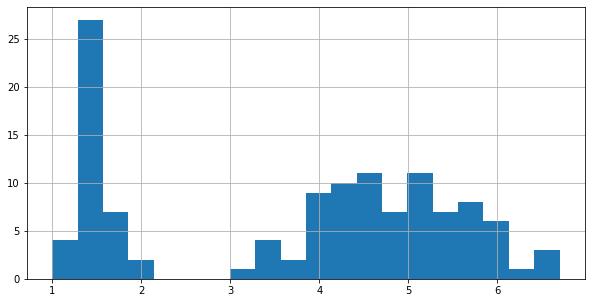

In [73]:
iris['petal length (cm)'].hist(bins = 20, figsize = (10, 5))